<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows", 5)
print('Done')

Done


Ещё раз (как и в задании 1) считайте в переменные `tr_mcc_codes`, `tr_types`, `transactions` и `customers_gender_train`. В `transactions` опять считайте только первые `1 000 000` строк.

In [2]:
### Type your code here


# Task 0

Соедините `transactions` с всеми остальными таблицами (`tr_mcc_codes`, `tr_types`, `gender_train`). Причём с `customers_gender_train` необходимо объединиться с помощью `left join`, а с оставшимися датафреймами - через `inner`.

После получения результата таблицы `gender_train`, `tr_types`, `tr_mcc_codes` можно удалить. В результате соединения датафреймов должно получиться `999584` строки.

In [3]:
### Type your code here


In [2]:
trans = pd.read_csv('Python And Data Analysis/data/transactions.csv', nrows=1000000)
mcc = pd.read_csv('Python And Data Analysis/data/tr_mcc_codes.csv', sep=';')
types = pd.read_csv('Python And Data Analysis/data/tr_types.csv', sep=';')
gender = pd.read_csv('Python And Data Analysis/data/gender_train.csv')

In [5]:
mcc

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
...,...,...
182,9399,"Правительственные услуги, нигде ранее не класс..."
183,9402,Почтовые услуги — только правительство


In [6]:
trans_gender = pd.merge(trans, gender, how='left', on='customer_id')
trans_gm = pd.merge(trans_gender, mcc, how='inner', on='mcc_code')
df = pd.merge(trans_gm, types, how='inner', on='tr_type')
df

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999583,89619970,105 23:38:49,3000,6000,204153.74,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


# Task 1

Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение `amount`). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате `"123.45"`

**Пояснения**:  
(\*) Если в результате для мужчин получились значения `[-1,-3,-5]`, а для женщин `[-1,-2,-3]`,  
то модуль разницы между средними арифметическими ``-3` и ``-2` будет равен 1.

(\*\*) Обратите внимание, что для вычисления модуля разности точных знаний о том, какой класc относится к мужчинам, а какой к женщинам, пока не требуется.

(\*\*\*) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [7]:
### Type your code here


In [8]:
costs = df.loc[df.amount < 0]
costs

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999565,62693770,333 19:26:37,4900,2320,-72385.87,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS
999566,62693770,333 19:27:26,4900,2320,-4491.83,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS


In [9]:
difference = costs.groupby('gender')['amount'].mean().diff()[1]
# difference = costs.groupby('gender').amount.mean().diff()
abs(round(difference, 2))

32718.05

# Task 2

### Условие 
1. Создайте новый столбец `mcc_code+tr_type`, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением `amount`. Посчитайте дисперсию по категориям получившегося столбца `mcc_code+tr_type`, в которых количество наблюдений `>= 10`. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате `"123456"` без дробной части.

**Пояснения**:  
(\*) Для конкатенации значений в столбцах можно использовать метод `.astype(str)`(\*\*\*) для серии и складывать соответствующие серии. Либо же применять `apply` к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\*\*) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией `.agg()`

(\*\*\*) as of now (v1.2.4), neither `astype('str')` nor `astype(str)` work. Use `.astype("string")` [Source](https://stackoverflow.com/questions/22231592/pandas-change-data-type-of-series-to-string)

In [10]:
### Type your code here


### Preparation

In [273]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows", 5)
print('Done')

Done


In [274]:
trans = pd.read_csv('Python And Data Analysis/data/transactions.csv', nrows=1000000)
mcc = pd.read_csv('Python And Data Analysis/data/tr_mcc_codes.csv', sep=';')
types = pd.read_csv('Python And Data Analysis/data/tr_types.csv', sep=';')
gender = pd.read_csv('Python And Data Analysis/data/gender_train.csv')

In [277]:
trans_gender = pd.merge(trans, gender, how='left', on='customer_id')
trans_gm = pd.merge(trans_gender, mcc, how='inner', on='mcc_code')
df = pd.merge(trans_gm, types, how='inner', on='tr_type')

In [278]:
df

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999583,89619970,105 23:38:49,3000,6000,204153.74,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


### `mcc_code+tr_type` creation

In [280]:
df['mcc_code+tr_type'] = df['mcc_code'].astype("string") + df['tr_type'].astype("string")

In [281]:
df

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code+tr_type
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
...,...,...,...,...,...,...,...,...,...,...
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000
999583,89619970,105 23:38:49,3000,6000,204153.74,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000


### df with the amount < 0

In [307]:
df_copy = df.loc[df.amount < 0].copy()
df_copy

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_code+tr_type
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
...,...,...,...,...,...,...,...,...,...,...
999565,62693770,333 19:26:37,4900,2320,-72385.87,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,49002320
999566,62693770,333 19:27:26,4900,2320,-4491.83,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,49002320


### filtering

In [308]:
grouped = df_copy.groupby(['mcc_code+tr_type'])
grouped

In [328]:
f = grouped.count()['mcc_code'] >= 10
f = f[f == False]
f

mcc_code+tr_type
17311010    False
17311110    False
            ...  
93991510    False
94021110    False
Name: mcc_code, Length: 259, dtype: bool

In [313]:
df_copy2 = df_copy.copy().set_index('mcc_code+tr_type')
df_copy2

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
mcc_code+tr_type,,,,,,,,,
48141030,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
48141030,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
49002320,62693770,333 19:26:37,4900,2320,-72385.87,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS
49002320,62693770,333 19:27:26,4900,2320,-4491.83,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS


In [330]:
df_copy = df_copy2.drop(index=f.index)

In [334]:
df_copy

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
mcc_code+tr_type,,,,,,,,,
48141030,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
48141030,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
49002320,62693770,333 19:26:37,4900,2320,-72385.87,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS
49002320,62693770,333 19:27:26,4900,2320,-4491.83,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS


### counting var

In [350]:
df_final = df_copy.groupby('mcc_code+tr_type')
df_final.describe()

customer_id                                         \
                       count          mean           std        min   
mcc_code+tr_type                                                      
17111110                18.0  5.705009e+07  2.757422e+07  6812280.0   
17991110                57.0  3.982885e+07  1.946533e+07  2040479.0   
...                      ...           ...           ...        ...   
93991100               157.0  4.043473e+07  3.221770e+07   493506.0   
93991200                18.0  6.888877e+07  2.183690e+07  4472392.0   

                                                                 mcc_code  \
                         25%         50%         75%         max    count   
mcc_code+tr_type                                                            
17111110          34047861.0  71729428.5  76758933.0  78867169.0     18.0   
17991110          35497384.0  35497384.0  56159156.0  85799976.0     57.0   
...                      ...         ...         ...         ...      ...   
93991100          14652271.0  24753950.0  72674186.0  99717689.0    157.0   
93991200          67934707.0  67934707.0  77695202.0  98488344.0     18.0   

                          ...      amount          gender                      \
                    mean  ...         75%      max  count      mean       std   
mcc_code+tr_type          ...                                                   
17111110          1711.0  ... -14171.7300 -2358.21   10.0  0.900000  0.316228   
17991110          1799.0  ...  -4042.6500  -673.77   37.0  0.864865  0.346583   
...                  ...  ...         ...      ...    ...       ...       ...   
93991100          9399.0  ... -11341.8700   -25.60   86.0  0.825581  0.381695   
93991200          9399.0  ... -28809.9325 -3469.94   14.0  0.642857  0.497245   

                                           
                  min  25%  50%  75%  max  
mcc_code+tr_type                           
17111110          0.0  1.0  1.0  1.0  1.0  
17991110          0.0  1.0  1.0  1.0  1.0  
...               ...  ...  ...  ...  ...  
93991100          0.0  1.0  1.0  1.0  1.0  
93991200          0.0  0.0  1.0  1.0  1.0  

[408 rows x 40 columns]

In [347]:
max_var = df_final['amount'].var().max()
max_var

12037786958150.154

In [349]:
min_var = df_final['amount'].var().min()
min_var

1312650.0193129827

In [344]:
answer = int(round(max_var / min_var, 0))
answer

9170599

# Task 3

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу `amount`) отдельно для мужчин и женщин (назовите ее `max_income`). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям `max_income`. (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    ```
    1) Покупка. POS ТУ СБ РФ	
    2) Списание после проведения претензионной работы	
    3) Плата за получение наличных. Россия
    4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    5) **Плата за получение наличных в АТМ. Россия** 
    6) Наличные. Зарубеж. банк	
    7) Возврат покупки. POS ТУ Россия
    ```

**Пояснения**:  
(\*) Если максимальные суммы приходов по каким-то типам были равны `[1,2,3,4,5,6,7,8]`, то 5 минимальных из них: `[1,2,3,4,5]`.

In [17]:
### Type your code here


In [18]:
pd.set_option("display.max_rows", 5)

df_copy = df.loc[df.amount > 0].set_index('tr_type').copy()
df_copy

,customer_id,tr_datetime,mcc_code,amount,term_id,gender,mcc_description,tr_description,mcc_code+tr_type
tr_type,,,,,,,,,
1100,22053688,20 00:00:00,4814,15721.41,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Покупка. ТУ Россия,48141100
1100,91330600,20 00:00:00,4814,11229.58,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Покупка. ТУ Россия,48141100
...,...,...,...,...,...,...,...,...,...
6000,89619970,104 23:39:35,3000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000
6000,89619970,105 23:38:49,3000,204153.74,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,30006000


In [19]:
# tmp = df_copy.set_index(['tr_type', 'gender'])
max_income = df_copy.groupby(['tr_type', 'gender']).max('amount').amount.unstack()
max_income

gender,0.0,1.0
tr_type,,
1010,24839.83,28803.87
1100,2097006.17,163727.26
...,...,...
8100,NaN,64682.37
8145,320145.86,NaN


In [20]:
# max_income = df_copy.groupby(['gender', 'tr_type']).max('amount')
# max_income = max_income.amount.unstack('gender')
# max_income

In [272]:
class_0 = max_income[0].dropna().sort_values().iloc[:5]
class_0

NameError: name 'max_income' is not defined

In [22]:
class_1 = max_income[1].dropna().sort_values().iloc[:5]
class_1

tr_type
4110     2245.92
2020     2245.92
1010    28803.87
8100    64682.37
6000    79280.83
Name: 1.0, dtype: float64

In [23]:
class_merge = pd.merge(class_0, class_1, on='tr_type', how='inner')
class_merge

,0.0,1.0
tr_type,,
4110,2245.92,2245.92


In [24]:
df_copy.loc[class_merge.index, 'tr_description'].iloc[0]

'Плата за получение наличных в АТМ. Россия'

# Task 4

### Условие
1. Выделите из поля `tr_datetime` относительный день `tr_day` (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день `tr_day` количество уникальных `MCC` кодов при транзакциях было больше `75` (можно воспользоваться функцией `nunique()`)
3. Сгруппируйте полученный отфильтрованный датафрейм по `MCC` коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\*\*): 
    ```
    1) **gender == 0 - женщины, gender == 1 - мужчины**
    2) gender == 1 - женщины, gender == 0 - мужчины
    3) **Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин**
    4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    5) **Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских**
    ```
    
**Пояснения**:  
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - `.str.split()` ([source](https://stackoverflow.com/questions/45983017/extracting-an-element-of-a-list-in-a-pandas-column)), например. Либо же реализовывать логику выделения подстроки с помощью метода `apply`.  
(\*\*) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [25]:
### Type your code here


### Preparation

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows", 5)
print('Done')

In [152]:
trans = pd.read_csv('Python And Data Analysis/data/transactions.csv', nrows=1000000)
mcc = pd.read_csv('Python And Data Analysis/data/tr_mcc_codes.csv', sep=';')
types = pd.read_csv('Python And Data Analysis/data/tr_types.csv', sep=';')
gender = pd.read_csv('Python And Data Analysis/data/gender_train.csv')

In [19]:
trans_gender = pd.merge(trans, gender, how='left', on='customer_id')
trans_gm = pd.merge(trans_gender, mcc, how='inner', on='mcc_code')
df = pd.merge(trans_gm, types, how='inner', on='tr_type')
df

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999583,89619970,105 23:38:49,3000,6000,204153.74,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


In [120]:
df_copy = df[['mcc_code', 'gender', 'amount', 'mcc_description']].copy()
df_copy

,mcc_code,gender,amount,mcc_description
0,4814,1.0,-2245.92,"Звонки с использованием телефонов, считывающих..."
1,4814,1.0,-5614.79,"Звонки с использованием телефонов, считывающих..."
...,...,...,...,...
999582,3000,NaN,408307.49,"Авиалинии, авиакомпании"
999583,3000,NaN,204153.74,"Авиалинии, авиакомпании"


In [121]:
df_copy['tr_day'] = df['tr_datetime'].str.split().str[0]
# df_copy = df_copy.set_index('tr_day')
df_copy

,mcc_code,gender,amount,mcc_description,tr_day
0,4814,1.0,-2245.92,"Звонки с использованием телефонов, считывающих...",0
1,4814,1.0,-5614.79,"Звонки с использованием телефонов, считывающих...",6
...,...,...,...,...,...
999582,3000,NaN,408307.49,"Авиалинии, авиакомпании",104
999583,3000,NaN,204153.74,"Авиалинии, авиакомпании",105


In [122]:
tr_groups = df_copy.groupby(['tr_day'])
f = tr_groups.mcc_code.nunique() > 75
f

tr_day
0     False
1     False
      ...  
98    False
99    False
Name: mcc_code, Length: 457, dtype: bool

In [123]:
# f.index

In [124]:
# f.index[f]

In [125]:
df_copy = pd.merge(df_copy, f, on='tr_day')
df_copy

,mcc_code_x,gender,amount,mcc_description,tr_day,mcc_code_y
0,4814,1.0,-2245.92,"Звонки с использованием телефонов, считывающих...",0,False
1,4814,1.0,-2245.92,"Звонки с использованием телефонов, считывающих...",0,False
...,...,...,...,...,...,...
999582,5812,1.0,-4154.94,"Места общественного питания, рестораны",345,True
999583,5812,1.0,-48736.37,"Места общественного питания, рестораны",345,True


In [126]:
df_copy2 = df_copy.groupby('mcc_code_y')
df_copy2.get_group(True)

,mcc_code_x,gender,amount,mcc_description,tr_day,mcc_code_y
7454,4814,1.0,-2245.92,"Звонки с использованием телефонов, считывающих...",13,True
7455,4814,1.0,-6737.75,"Звонки с использованием телефонов, считывающих...",13,True
...,...,...,...,...,...,...
999582,5812,1.0,-4154.94,"Места общественного питания, рестораны",345,True
999583,5812,1.0,-48736.37,"Места общественного питания, рестораны",345,True


In [127]:
df_final = df_copy2.get_group(True).copy()
df_final

,mcc_code_x,gender,amount,mcc_description,tr_day,mcc_code_y
7454,4814,1.0,-2245.92,"Звонки с использованием телефонов, считывающих...",13,True
7455,4814,1.0,-6737.75,"Звонки с использованием телефонов, считывающих...",13,True
...,...,...,...,...,...,...
999582,5812,1.0,-4154.94,"Места общественного питания, рестораны",345,True
999583,5812,1.0,-48736.37,"Места общественного питания, рестораны",345,True


In [169]:
# df_final = df_final.drop('mcc_code_y', axis=1).rename(columns={'mcc_code_x': 'mcc_code'})
df_final = df_final.rename(columns={'mcc_code_x': 'mcc_code', 'mcc_code_y': 'bool'})
df_final

,mcc_code,gender,amount,mcc_description,tr_day,bool
7454,4814,1.0,-2245.92,"Звонки с использованием телефонов, считывающих...",13,True
7455,4814,1.0,-6737.75,"Звонки с использованием телефонов, считывающих...",13,True
...,...,...,...,...,...,...
999582,5812,1.0,-4154.94,"Места общественного питания, рестораны",345,True
999583,5812,1.0,-48736.37,"Места общественного питания, рестораны",345,True


In [200]:
gender_gr = df_final.groupby('gender')
gender_gr.count()

,mcc_code,amount,mcc_description,tr_day,bool
gender,,,,,
0.0,162016,162016,162016,162016,162016
1.0,205773,205773,205773,205773,205773


### MCC descriptions

In [181]:
mcc_ind = mcc.set_index('mcc_code')
mcc_ind

,mcc_description
mcc_code,
742,Ветеринарные услуги
1711,"Генеральные подрядчики по вентиляции, теплосна..."
...,...
9399,"Правительственные услуги, нигде ранее не класс..."
9402,Почтовые услуги — только правительство


In [412]:
n = 200
pd.set_option("display.max_rows", 5)

### Class 0

In [413]:
class0 = gender_gr.get_group(0)
class0

,mcc_code,gender,amount,mcc_description,tr_day,bool
7456,4814,0.0,-11229.58,"Звонки с использованием телефонов, считывающих...",13,True
7457,4814,0.0,-2245.92,"Звонки с использованием телефонов, считывающих...",13,True
...,...,...,...,...,...,...
999577,6010,0.0,224591.58,Финансовые институты — снятие наличности вручную,345,True
999580,6010,0.0,89836.63,Финансовые институты — снятие наличности вручную,345,True


In [414]:
class0_head = class0.groupby('mcc_code').count().sort_values(by='tr_day', ascending=False).head(n)
class0_head

,gender,amount,mcc_description,tr_day,bool
mcc_code,,,,,
6011,33730,33730,33730,33730,33730
5411,25504,25504,25504,25504,25504
...,...,...,...,...,...
7372,1,1,1,1,1
5969,1,1,1,1,1


In [415]:
class0_bool = class0.groupby('mcc_code').bool.mean()[class0_head.index]
class0_bool

mcc_code
6011    1.0
5411    1.0
       ... 
7372    1.0
5969    1.0
Name: bool, Length: 171, dtype: float64

In [416]:
class0_mean = class0.groupby('mcc_code').amount.mean()[class0_head.index]
class0_mean

mcc_code
6011   -45226.375332
5411   -14036.866059
            ...     
7372    -4886.890000
5969    44527.530000
Name: amount, Length: 171, dtype: float64

In [417]:
class0_median = class0.groupby('mcc_code').amount.median()[class0_head.index]
class0_median

mcc_code
6011   -22459.16
5411    -8534.48
          ...   
7372    -4886.89
5969    44527.53
Name: amount, Length: 171, dtype: float64

In [418]:
class0_mcc = mcc_ind.loc[class0_head.index]
class0_mcc

,mcc_description
mcc_code,
6011,Финансовые институты — снятие наличности автом...
5411,"Бакалейные магазины, супермаркеты"
...,...
7372,"Программирование, обработка данных, интегриров..."
5969,Прямой маркетинг — другие торговые точки прямо...


In [419]:
class0_head.index

Int64Index([6011, 5411, 4814, 6010, 4829, 5499, 5912, 5331, 5812, 5814,
            ...
            8699, 2741, 8244, 1711, 5013, 8220, 5199, 5085, 7372, 5969],
           dtype='int64', name='mcc_code', length=171)

In [420]:
# all data on class0
df0 = pd.merge(class0_mean, class0_median, on='mcc_code', how='outer')
df0 = df0.rename(columns={'amount_x': 'mean0', 'amount_y': 'median0'})
df0 = pd.merge(df0, class0_mcc, on='mcc_code', how='outer')
df0 = pd.merge(df0, class0_bool, on='mcc_code', how='outer')
df0

,mean0,median0,mcc_description,bool
mcc_code,,,,
6011,-45226.375332,-22459.16,Финансовые институты — снятие наличности автом...,1.0
5411,-14036.866059,-8534.48,"Бакалейные магазины, супермаркеты",1.0
...,...,...,...,...
7372,-4886.890000,-4886.89,"Программирование, обработка данных, интегриров...",1.0
5969,44527.530000,44527.53,Прямой маркетинг — другие торговые точки прямо...,1.0


### Class 1

In [421]:
class1 = gender_gr.get_group(1)
class1

,mcc_code,gender,amount,mcc_description,tr_day,bool
7454,4814,1.0,-2245.92,"Звонки с использованием телефонов, считывающих...",13,True
7455,4814,1.0,-6737.75,"Звонки с использованием телефонов, считывающих...",13,True
...,...,...,...,...,...,...
999582,5812,1.0,-4154.94,"Места общественного питания, рестораны",345,True
999583,5812,1.0,-48736.37,"Места общественного питания, рестораны",345,True


In [422]:
# Most typical mcc's
class1_head = class1.groupby('mcc_code').count().sort_values(by='tr_day', ascending=False).head(n)
class1_head

,gender,amount,mcc_description,tr_day,bool
mcc_code,,,,,
6010,71481,71481,71481,71481,71481
6011,33394,33394,33394,33394,33394
...,...,...,...,...,...
1731,1,1,1,1,1
9402,1,1,1,1,1


In [423]:
class1_bool = class1.groupby('mcc_code').bool.mean()[class1_head.index]
class1_bool

mcc_code
6010    1.0
6011    1.0
       ... 
1731    1.0
9402    1.0
Name: bool, Length: 171, dtype: float64

In [424]:
class1_mean = class1.groupby('mcc_code').amount.mean()[class1_head.index]
class1_mean

mcc_code
6010    50316.674855
6011   -83739.628926
            ...     
1731   -55923.300000
9402    -4581.670000
Name: amount, Length: 171, dtype: float64

In [425]:
class1_median = class1.groupby('mcc_code').amount.median()[class1_head.index]
class1_median

mcc_code
6010    10780.40
6011   -33688.74
          ...   
1731   -55923.30
9402    -4581.67
Name: amount, Length: 171, dtype: float64

In [426]:
class1_mcc = mcc_ind.loc[class1_head.index]
class1_mcc

,mcc_description
mcc_code,
6010,Финансовые институты — снятие наличности вручную
6011,Финансовые институты — снятие наличности автом...
...,...
1731,Подрядчики по электричеству
9402,Почтовые услуги — только правительство


In [427]:
class1_head.index

Int64Index([6010, 6011, 5411, 4814, 4829, 5499, 5541, 5812, 5912, 5331,
            ...
            5085, 4214, 7932, 7375, 5971, 5967, 8244, 3351, 1731, 9402],
           dtype='int64', name='mcc_code', length=171)

In [428]:
# class2 = class1.set_index('mcc_code')
# class2 = class2[class2.index not in class1_head.index]
# class2.index

In [429]:
# all data on class1
df1 = pd.merge(class1_mean, class1_median, on='mcc_code', how='outer')
df1 = df1.rename(columns={'amount_x': 'mean1', 'amount_y': 'median1'})
df1 = pd.merge(df1, class1_mcc, on='mcc_code', how='outer')
df1 = pd.merge(df1, class1_bool, on='mcc_code', how='outer')
df1

,mean1,median1,mcc_description,bool
mcc_code,,,,
6010,50316.674855,10780.40,Финансовые институты — снятие наличности вручную,1.0
6011,-83739.628926,-33688.74,Финансовые институты — снятие наличности автом...,1.0
...,...,...,...,...
1731,-55923.300000,-55923.30,Подрядчики по электричеству,1.0
9402,-4581.670000,-4581.67,Почтовые услуги — только правительство,1.0


### Analysis

In [430]:
df_merged = pd.merge(df0, df1, on='mcc_code', how='outer')

In [432]:
pd.set_option("display.max_rows", 250)
df_merged

,mean0,median0,mcc_description_x,bool_x,mean1,median1,mcc_description_y,bool_y
mcc_code,,,,,,,,
6011,-45226.375332,-22459.160,Финансовые институты — снятие наличности автом...,1.0,-83739.628926,-33688.740,Финансовые институты — снятие наличности автом...,1.0
5411,-14036.866059,-8534.480,"Бакалейные магазины, супермаркеты",1.0,-15511.036439,-7770.870,"Бакалейные магазины, супермаркеты",1.0
4814,-4727.975060,-2245.920,"Звонки с использованием телефонов, считывающих...",1.0,-6183.640707,-3368.870,"Звонки с использованием телефонов, считывающих...",1.0
6010,98769.535392,14261.570,Финансовые институты — снятие наличности вручную,1.0,50316.674855,10780.400,Финансовые институты — снятие наличности вручную,1.0
4829,-140837.637737,-22459.160,Денежные переводы,1.0,-279241.945272,-65837.895,Денежные переводы,1.0
5499,-8458.868067,-5120.690,"Различные продовольственные магазины — рынки, ...",1.0,-7844.639677,-5098.230,"Различные продовольственные магазины — рынки, ...",1.0
5912,-15000.141991,-8056.215,Аптеки,1.0,-14287.179381,-8046.555,Аптеки,1.0
5331,-16317.902659,-6142.130,Универсальные магазины,1.0,-16776.441199,-7254.310,Универсальные магазины,1.0
5812,-14334.223452,-4738.880,"Места общественного питания, рестораны",1.0,-26571.437719,-7186.930,"Места общественного питания, рестораны",1.0


# Task 5 (супер)

### Условие
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов `amount_bucket` равного объёма (с помощью `pd.qcut`), разбив все траты на категории `'Very High'`, `'High'`, `'Middle'`, `'Low'`, `'Very Low'`. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории `'Income'`.  
(воспользуйтесь функцией `.cat.add_categories('Income')` для того, чтобы добавить новую категорию `'Income'` к категориям `'Very High'`, `'High'`, `'Middle'`, `'Low'`, `'Very Low'`, а затем [заполните](https://stackoverflow.com/questions/32718639/pandas-filling-nans-in-categorical-data) пустые значения новой категорией).
3. Из поля `tr_datetime` выделите час `tr_hour`, в который произошла транзакция, как первые 2 цифры до `:`. (\*\*)
3. После этого постройте сводную таблицу, значениями в которой является пол `gender`, индексы - `tr_hour`, столбцы - `amount_bucket`.
4. Отрисуйте полученные результаты, передав их в функцию `plot_pivot_table`, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

**Вопросы**:  

    - 1) **Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.**
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) **Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами**.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) **Посмотрев на долю мужчин в максимальных тратах средств (`Very High`), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.**

**Пояснения**:  
(\*) Обратите внимание, что в категории `Very High` Должны оказаться максимальные по модулю отрицательные транзакции.
(\*\*) Например, для строки `"0 10:23:26"` час будет равен 10, а для строки `"6 07:08:31"`- 07. Можно воспользоваться функциями `str.split()` или `str.find()` и функцией `.apply(lambda x: x[])`

### Preparation

In [355]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

In [356]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows", 5)
print('Done')

Done


#### Basic df creation

In [357]:
trans = pd.read_csv('Python And Data Analysis/data/transactions.csv', nrows=1000000)
mcc = pd.read_csv('Python And Data Analysis/data/tr_mcc_codes.csv', sep=';')
types = pd.read_csv('Python And Data Analysis/data/tr_types.csv', sep=';')
gender = pd.read_csv('Python And Data Analysis/data/gender_train.csv')

In [358]:
trans_gender = pd.merge(trans, gender, how='left', on='customer_id')
trans_gm = pd.merge(trans_gender, mcc, how='inner', on='mcc_code')
df = pd.merge(trans_gm, types, how='inner', on='tr_type')

In [359]:
df

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999583,89619970,105 23:38:49,3000,6000,204153.74,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


#### df copy creation

In [360]:
df.columns

Index(['customer_id', 'tr_datetime', 'mcc_code', 'tr_type', 'amount',
       'term_id', 'gender', 'mcc_description', 'tr_description'],
      dtype='object')

In [361]:
df_copy = df.drop(columns=['customer_id', 'mcc_code', 
                           'tr_type', 'term_id', 'mcc_description', 
                           'tr_description'])

In [362]:
df_copy

,tr_datetime,amount,gender
0,0 10:23:26,-2245.92,1.0
1,6 07:08:31,-5614.79,1.0
...,...,...,...
999582,104 23:39:35,408307.49,NaN
999583,105 23:38:49,204153.74,NaN


#### Negative `amount` values df

In [363]:
costs = df_copy.loc[df_copy.amount < 0].sort_values(by='amount', ascending=True)
costs

,tr_datetime,amount,gender
746087,151 11:35:21,-1.459845e+08,1.0
733936,143 14:08:16,-1.347549e+08,1.0
...,...,...,...
782615,121 16:50:32,-2.200000e-01,1.0
343669,201 07:56:14,-2.200000e-01,NaN


#### `qcut` implementation

In [364]:
labels = ['Very High', 'High', 'Middle', 'Low', 'Very Low']
df_copy['amount_bucket'] = pd.qcut(costs['amount'], 5, labels=labels)
df_copy

,tr_datetime,amount,gender,amount_bucket
0,0 10:23:26,-2245.92,1.0,Very Low
1,6 07:08:31,-5614.79,1.0,Low
...,...,...,...,...
999582,104 23:39:35,408307.49,NaN,NaN
999583,105 23:38:49,204153.74,NaN,NaN


#### `Income` category added

In [365]:
df_copy['amount_bucket'] = df_copy['amount_bucket'].cat.add_categories('Income').fillna('Income')
df_copy['amount_bucket']

0         Very Low
1              Low
            ...   
999582      Income
999583      Income
Name: amount_bucket, Length: 999584, dtype: category
Categories (6, object): ['Very High' < 'High' < 'Middle' < 'Low' < 'Very Low' < 'Income']

In [366]:
df_copy

,tr_datetime,amount,gender,amount_bucket
0,0 10:23:26,-2245.92,1.0,Very Low
1,6 07:08:31,-5614.79,1.0,Low
...,...,...,...,...
999582,104 23:39:35,408307.49,NaN,Income
999583,105 23:38:49,204153.74,NaN,Income


#### Extracting hour

In [367]:
df_copy2 = df_copy.copy()
df_copy2

,tr_datetime,amount,gender,amount_bucket
0,0 10:23:26,-2245.92,1.0,Very Low
1,6 07:08:31,-5614.79,1.0,Low
...,...,...,...,...
999582,104 23:39:35,408307.49,NaN,Income
999583,105 23:38:49,204153.74,NaN,Income


In [368]:
df_copy2['tr_time'] = df_copy['tr_datetime'].str.split().str[1]

In [369]:
df_copy2['tr_hour'] = df_copy2['tr_time'].str.split(':').str[0]

In [370]:
df_copy2 = df_copy2.drop(columns=['tr_datetime', 'tr_time']).dropna(how='any')

In [371]:
df_copy2

,amount,gender,amount_bucket,tr_hour
0,-2245.92,1.0,Very Low,10
1,-5614.79,1.0,Low,07
...,...,...,...,...
999575,1498385.17,0.0,Income,23
999576,570417.69,0.0,Income,23


### Implementing function

In [372]:
# df_mine = df_copy2.set_index('tr_hour').sort_index()
df_mine = df_copy2.groupby(['tr_hour', 'gender'])

In [373]:
pd.set_option("display.max_rows", 100)
df_mine.value_counts()

tr_hour  gender  amount         amount_bucket
00       0.0     -2.245920e+03  Very Low         757
                 -1.122960e+03  Very Low         572
                 -1.122958e+04  Middle           280
                 -2.245916e+04  High             207
                 -6.737750e+03  Middle           196
                                                ... 
23       1.0     -1.137534e+04  Middle             0
                                High               0
                                Very High          0
                 -1.137556e+04  Income             0
                  1.459845e+08  Income             0
Length: 24208128, dtype: int64

In [374]:
df_final = df_copy2.pivot_table(values=['gender'], index=['tr_hour', 'amount_bucket']).unstack()

In [375]:
pd.set_option("display.max_rows", 10)
df_final

gender                                                  
amount_bucket Very High      High    Middle       Low  Very Low    Income
tr_hour                                                                  
00             0.578957  0.581928  0.530195  0.544178  0.517352  0.737148
01             0.583643  0.594737  0.578947  0.539936  0.450237  0.965922
02             0.524804  0.454183  0.489796  0.371014  0.349099  0.965834
03             0.533541  0.390374  0.434000  0.358879  0.284333  0.945011
04             0.505653  0.438721  0.428981  0.450858  0.290030  0.914473
...                 ...       ...       ...       ...       ...       ...
19             0.555212  0.540087  0.538301  0.554324  0.472097  0.507789
20             0.588857  0.537678  0.554148  0.574704  0.469018  0.492320
21             0.610084  0.566735  0.581828  0.615127  0.466822  0.515667
22             0.624886  0.633136  0.633929  0.632524  0.443955  0.612475
23             0.592145  0.626289  0.649485  0.617450  0.406798  0.763496

[24 rows x 6 columns]

In [383]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

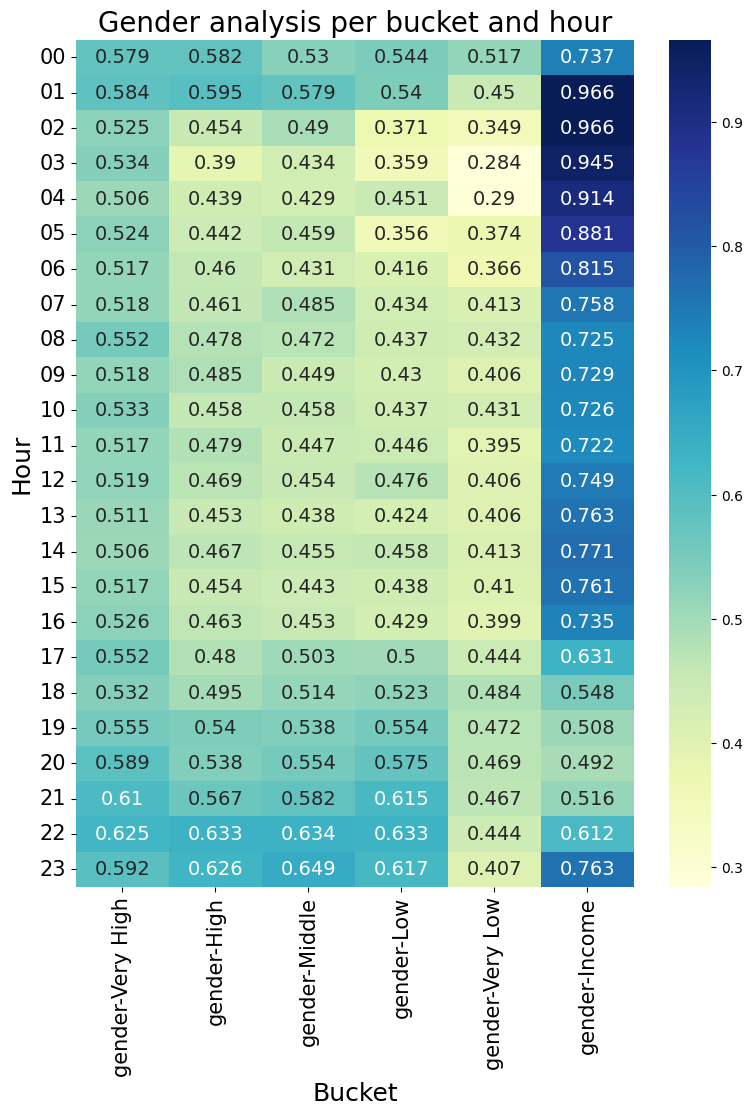

In [384]:
pivot_table = df_final
plot_pivot_table(pivot_table)

# Task 6

### Условие

1. Измените тип поля `tr_day` на `int`.
2. Выберите из `transactions` все MCC коды, которые встретились в выборке более, чем `60 000` раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы `amount`.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод `unstack()`) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

**Вопросы:**  

    - 1) **2 из полученных MCC-кодов связаны с финансовыми институтами**
    - 2) **2 MCC кода, связанные со снятием наличности, имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)**
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) **Денежные переводы имеют как минимум 3 явных минимума средних**
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

### Preparation

In [1]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows", 5)
print('Done')

Done


#### Basic df creation

In [35]:
trans = pd.read_csv('Python And Data Analysis/data/transactions.csv', nrows=1000000)
mcc = pd.read_csv('Python And Data Analysis/data/tr_mcc_codes.csv', sep=';')
types = pd.read_csv('Python And Data Analysis/data/tr_types.csv', sep=';')
gender = pd.read_csv('Python And Data Analysis/data/gender_train.csv')

In [36]:
trans_gender = pd.merge(trans, gender, how='left', on='customer_id')
trans_gm = pd.merge(trans_gender, mcc, how='inner', on='mcc_code')
df = pd.merge(trans_gm, types, how='inner', on='tr_type')

In [37]:
df

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999583,89619970,105 23:38:49,3000,6000,204153.74,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


#### `tr_day` column creation

In [157]:
df_copy = df[['mcc_code', 'amount', 'mcc_description']].copy()

In [158]:
df_copy

,mcc_code,amount,mcc_description
0,4814,-2245.92,"Звонки с использованием телефонов, считывающих..."
1,4814,-5614.79,"Звонки с использованием телефонов, считывающих..."
...,...,...,...
999582,3000,408307.49,"Авиалинии, авиакомпании"
999583,3000,204153.74,"Авиалинии, авиакомпании"


In [159]:
df_copy['tr_day'] = df['tr_datetime'].str.split().str[0]

In [160]:
df_copy

,mcc_code,amount,mcc_description,tr_day
0,4814,-2245.92,"Звонки с использованием телефонов, считывающих...",0
1,4814,-5614.79,"Звонки с использованием телефонов, считывающих...",6
...,...,...,...,...
999582,3000,408307.49,"Авиалинии, авиакомпании",104
999583,3000,204153.74,"Авиалинии, авиакомпании",105


In [161]:
df_copy.tr_day.dtypes

dtype('O')

In [162]:
df_copy.tr_day.astype('int32')

0           0
1           6
         ... 
999582    104
999583    105
Name: tr_day, Length: 999584, dtype: int32

#### `mcc_code` counting

In [174]:
df_copy

,mcc_code,amount,mcc_description,tr_day
0,4814,-2245.92,"Звонки с использованием телефонов, считывающих...",0
1,4814,-5614.79,"Звонки с использованием телефонов, считывающих...",6
...,...,...,...,...
999582,3000,408307.49,"Авиалинии, авиакомпании",104
999583,3000,204153.74,"Авиалинии, авиакомпании",105


In [251]:
df_mcc = df_copy.groupby(['mcc_code'])
df_mcc

In [252]:
f = df_mcc['tr_day'].count() > 60000
f

mcc_code
742     False
1711    False
1731    False
1799    False
2741    False
        ...  
9211    False
9222    False
9311    False
9399    False
9402    False
Name: tr_day, Length: 184, dtype: bool

In [253]:
df_copy2 = df_copy.set_index('mcc_code')
df_copy2

,amount,mcc_description,tr_day
mcc_code,,,
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",0
4814,-5614.79,"Звонки с использованием телефонов, считывающих...",6
4814,-1122.96,"Звонки с использованием телефонов, считывающих...",8
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",11
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",11
...,...,...,...
3000,1297824.89,"Авиалинии, авиакомпании",18
3000,124693.24,"Авиалинии, авиакомпании",206
3000,218976.79,"Авиалинии, авиакомпании",90


In [254]:
df_copy2 = pd.merge(df_copy2, f, on='mcc_code')
df_copy2

,amount,mcc_description,tr_day_x,tr_day_y
mcc_code,,,,
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",0,True
4814,-5614.79,"Звонки с использованием телефонов, считывающих...",6,True
4814,-1122.96,"Звонки с использованием телефонов, считывающих...",8,True
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",11,True
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",11,True
...,...,...,...,...
6011,53901.98,Финансовые институты — снятие наличности автом...,188,True
6011,112295.79,Финансовые институты — снятие наличности автом...,188,True
6011,463781.61,Финансовые институты — снятие наличности автом...,445,True


In [255]:
df_copy2 = df_copy2.rename(columns={
    'tr_day_x': 'tr_day',
    'tr_day_y': 'bool'
})
df_copy2

,amount,mcc_description,tr_day,bool
mcc_code,,,,
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",0,True
4814,-5614.79,"Звонки с использованием телефонов, считывающих...",6,True
4814,-1122.96,"Звонки с использованием телефонов, считывающих...",8,True
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",11,True
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",11,True
...,...,...,...,...
6011,53901.98,Финансовые институты — снятие наличности автом...,188,True
6011,112295.79,Финансовые институты — снятие наличности автом...,188,True
6011,463781.61,Финансовые институты — снятие наличности автом...,445,True


#### `df_final` creation

In [256]:
bool_grouped = df_copy2.groupby('bool')

In [257]:
df_final = bool_grouped.get_group(True).copy().drop(columns=['bool'])
df_final

,amount,mcc_description,tr_day
mcc_code,,,
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",0
4814,-5614.79,"Звонки с использованием телефонов, считывающих...",6
4814,-1122.96,"Звонки с использованием телефонов, считывающих...",8
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",11
4814,-2245.92,"Звонки с использованием телефонов, считывающих...",11
...,...,...,...
6011,53901.98,Финансовые институты — снятие наличности автом...,188
6011,112295.79,Финансовые институты — снятие наличности автом...,188
6011,463781.61,Финансовые институты — снятие наличности автом...,445


### Analysis

In [258]:
df_grouped = df_final.groupby(['tr_day', 'mcc_description'])
df_grouped

In [259]:
pd.set_option("display.max_rows", 10)
df_grouped

In [268]:
df_means = df_grouped['amount'].mean().unstack()
df_means.sort_values("Денежные переводы")

mcc_description,"Бакалейные магазины, супермаркеты",Денежные переводы,"Звонки с использованием телефонов, считывающих магнитную ленту",Финансовые институты — снятие наличности автоматически,Финансовые институты — снятие наличности вручную
tr_day,,,,,
143,-15235.182594,-1.381755e+06,-7253.484308,-77241.244030,481720.293143
151,-24954.047047,-1.002006e+06,-5725.845000,-112905.191342,515905.040508
43,-19676.833175,-7.314063e+05,-3425.994810,-48803.252950,774887.315566
122,-12647.642996,-5.155797e+05,-5479.196317,-80097.794761,339255.521741
115,-10798.383000,-4.727137e+05,-5478.701378,-42618.653106,128100.226615
...,...,...,...,...,...
175,-18198.027254,-9.214742e+04,-4471.286537,-81851.271115,55331.731793
69,-15151.197166,-8.946348e+04,-5082.382177,-101002.665112,46149.688649
65,-14653.672362,-8.781372e+04,-4798.174089,-88896.163981,78458.804770


In [270]:
df_means.describe()

mcc_description,"Бакалейные магазины, супермаркеты",Денежные переводы,"Звонки с использованием телефонов, считывающих магнитную ленту",Финансовые институты — снятие наличности автоматически,Финансовые институты — снятие наличности вручную
count,457.000000,4.570000e+02,457.000000,457.000000,457.000000
mean,-14912.440027,-1.966454e+05,-5382.674681,-64228.157084,82253.663234
std,2692.798168,9.430923e+04,1325.644435,24594.290133,58426.542319
min,-26728.280509,-1.381755e+06,-28014.555705,-148535.684029,-24760.798095
25%,-16704.653134,-2.224457e+05,-5727.330709,-79087.781223,52926.491420
50%,-14363.892816,-1.832968e+05,-5232.605219,-63934.586864,71000.284071
75%,-12854.403760,-1.510759e+05,-4826.598063,-49201.280484,97106.748032
max,-10353.740089,-6.050994e+04,-3425.994810,40430.668599,774887.315566


In [202]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

TypeError: Got both 'size' and 'fontsize', which are aliases of one another

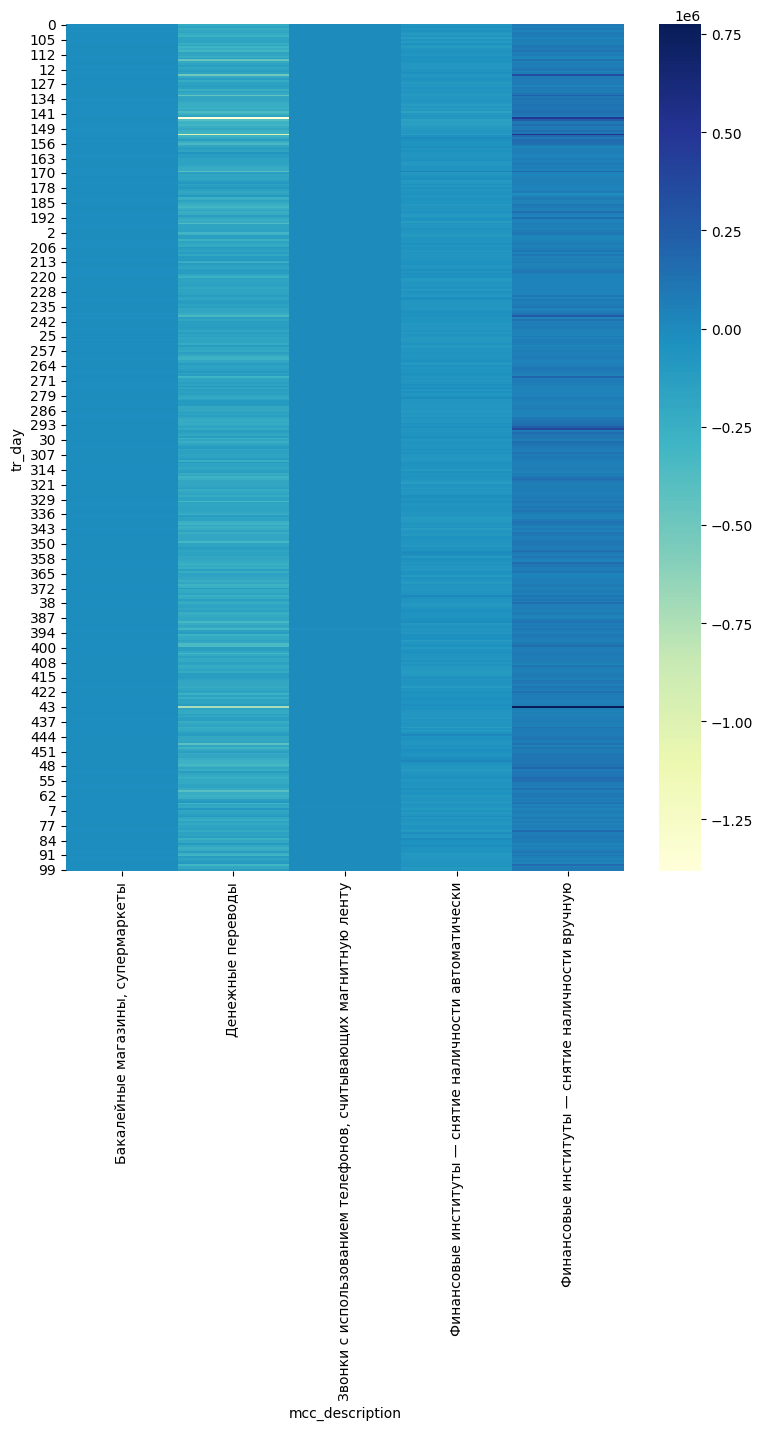

In [263]:
pivot_table = df_means
plot_pivot_table(pivot_table)